In [7]:
# dependencies
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from citipy import citipy
from datetime import datetime

In [8]:
# create random latitude and longitude combos
lats = np.random.uniform(low = -90, high = 90, size = 1500)
lngs = np.random.uniform(low = -180, high = 180, size = 1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [9]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)
coordinates

[(0.750402434408656, 97.13411488198773),
 (-59.88510697525366, -27.298464938984807),
 (41.88866128441305, 18.592404642531335),
 (-34.64347186599939, 137.07556377468507),
 (89.34789081491044, 177.4467755204883),
 (6.290037404087428, -52.88463465042655),
 (-40.52342358736085, -19.811768911165416),
 (55.806090596379335, -25.30298977628658),
 (37.600952078564006, 33.804696793625595),
 (-15.69222979270802, -104.00588400733187),
 (9.763155804891525, -174.4852979900059),
 (-35.889342107075855, 78.48577053682982),
 (8.764701108082946, 13.695857419809471),
 (4.278707009832033, 84.34558445823188),
 (80.03163420447007, -99.29954393063854),
 (67.8848811317061, -78.3531607542762),
 (-85.60074555478822, -142.32023245161656),
 (9.631468202821196, -137.78128525293116),
 (-20.699241076454797, 50.57896302034081),
 (-58.68544239526642, -115.63340152115703),
 (-15.73411687724169, 29.96001448541722),
 (-86.74207389327084, 80.54245018958756),
 (16.716889684807867, 121.84062408912962),
 (42.29399887203658, 1

In [10]:
len(coordinates)

1500

In [11]:
# create list to hold city names
cities = []

In [12]:
# identify nearest city to set of coordinates
notIn = 0
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name
    # if city is unique (not in the list) then append to list
    if city not in cities:
        notIn+=1
        cities.append(city)
    
# print to confirm number of cities
print(len(cities))
print(notIn)


626
626


In [13]:
cities

['sibolga',
 'chuy',
 'ulcinj',
 'port lincoln',
 'leningradskiy',
 'iracoubo',
 'arraial do cabo',
 'grindavik',
 'eregli',
 'puerto ayora',
 'kapaa',
 'bambous virieux',
 'lagdo',
 'hambantota',
 'yellowknife',
 'clyde river',
 'mataura',
 'atuona',
 'mahanoro',
 'rikitea',
 'luangwa',
 'busselton',
 'san guillermo',
 'avezzano',
 'narsaq',
 'thompson',
 'albany',
 'qaanaaq',
 'cherskiy',
 'nanortalik',
 'chokurdakh',
 'ust-kamchatsk',
 'axim',
 'east london',
 'victoria',
 'barentsburg',
 'hermanus',
 'qaqortoq',
 'portland',
 'poum',
 'butaritari',
 'te anau',
 'vaini',
 'severo-kurilsk',
 'tumannyy',
 'tuatapere',
 'batobalani',
 'bredasdorp',
 'taolanaro',
 'cidreira',
 'punta arenas',
 'saint-georges',
 'tasiilaq',
 'vaitupu',
 'isabela',
 'cabo san lucas',
 'touros',
 'sumbe',
 'tezu',
 'pevek',
 'mitchell',
 'hilo',
 'pangody',
 'cape town',
 'namatanai',
 'pakokku',
 'mareeba',
 'maniitsoq',
 'watsa',
 'karakendzha',
 'saint anthony',
 'kamenka',
 'spearfish',
 'hobart',
 'di

In [14]:
print(len(cities))

626


In [15]:
# import requests library
import requests

# import the API key
from config import weather_api_key

In [16]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
print(url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=f26aca23ff8f04b887ddbf6955e8db29


In [17]:
# empty list to hold the weather data
city_data = []
# print beginning of the logging
print("Beginning data retrieval        ")
print("--------------------------------")

# create counters
record_count = 1
set_count = 1


Beginning data retrieval        
--------------------------------


In [18]:
# iterate through the items in cities list
for i, city in enumerate(cities):
    
    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    
    # Add 1 to the record count.
    record_count += 1
   
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")
  

Processing Record 1 of Set 1 | sibolga
Processing Record 2 of Set 1 | chuy
Processing Record 3 of Set 1 | ulcinj
Processing Record 4 of Set 1 | port lincoln
Processing Record 5 of Set 1 | leningradskiy
Processing Record 6 of Set 1 | iracoubo
Processing Record 7 of Set 1 | arraial do cabo
Processing Record 8 of Set 1 | grindavik
Processing Record 9 of Set 1 | eregli
Processing Record 10 of Set 1 | puerto ayora
Processing Record 11 of Set 1 | kapaa
Processing Record 12 of Set 1 | bambous virieux
Processing Record 13 of Set 1 | lagdo
Processing Record 14 of Set 1 | hambantota
Processing Record 15 of Set 1 | yellowknife
Processing Record 16 of Set 1 | clyde river
Processing Record 17 of Set 1 | mataura
Processing Record 18 of Set 1 | atuona
Processing Record 19 of Set 1 | mahanoro
Processing Record 20 of Set 1 | rikitea
Processing Record 21 of Set 1 | luangwa
Processing Record 22 of Set 1 | busselton
Processing Record 23 of Set 1 | san guillermo
Processing Record 24 of Set 1 | avezzano
Pro

Processing Record 39 of Set 4 | hit
Processing Record 40 of Set 4 | akdepe
Processing Record 41 of Set 4 | poroina mare
Processing Record 42 of Set 4 | aykhal
Processing Record 43 of Set 4 | mar del plata
Processing Record 44 of Set 4 | solnechnyy
Processing Record 45 of Set 4 | umm lajj
Processing Record 46 of Set 4 | codrington
Processing Record 47 of Set 4 | belyy yar
Processing Record 48 of Set 4 | broome
Processing Record 49 of Set 4 | tidore
City not found. Skipping...
Processing Record 50 of Set 4 | viransehir
Processing Record 1 of Set 5 | atar
Processing Record 2 of Set 5 | karasburg
Processing Record 3 of Set 5 | kaeo
Processing Record 4 of Set 5 | yunyang
Processing Record 5 of Set 5 | nome
Processing Record 6 of Set 5 | hwange
Processing Record 7 of Set 5 | los llanos de aridane
Processing Record 8 of Set 5 | isangel
Processing Record 9 of Set 5 | puerto escondido
Processing Record 10 of Set 5 | port hawkesbury
Processing Record 11 of Set 5 | price
Processing Record 12 of S

Processing Record 27 of Set 8 | aranos
Processing Record 28 of Set 8 | aguimes
Processing Record 29 of Set 8 | lethem
Processing Record 30 of Set 8 | gagino
Processing Record 31 of Set 8 | kolosovka
Processing Record 32 of Set 8 | porto walter
Processing Record 33 of Set 8 | clyde
Processing Record 34 of Set 8 | jiuquan
Processing Record 35 of Set 8 | lozova
Processing Record 36 of Set 8 | amarante
Processing Record 37 of Set 8 | bonfim
Processing Record 38 of Set 8 | mul
Processing Record 39 of Set 8 | olga
Processing Record 40 of Set 8 | manokwari
Processing Record 41 of Set 8 | santa ines
Processing Record 42 of Set 8 | tarudant
City not found. Skipping...
Processing Record 43 of Set 8 | tongren
Processing Record 44 of Set 8 | salinas
Processing Record 45 of Set 8 | yukamenskoye
Processing Record 46 of Set 8 | port blair
Processing Record 47 of Set 8 | mashhad
Processing Record 48 of Set 8 | manali
Processing Record 49 of Set 8 | nova olimpia
Processing Record 50 of Set 8 | foam lak

Processing Record 15 of Set 12 | shubarshi
Processing Record 16 of Set 12 | tawang
Processing Record 17 of Set 12 | namibe
Processing Record 18 of Set 12 | tuxpan
Processing Record 19 of Set 12 | magadi
Processing Record 20 of Set 12 | kaiyuan
Processing Record 21 of Set 12 | aloleng
Processing Record 22 of Set 12 | veraval
Processing Record 23 of Set 12 | thinadhoo
Processing Record 24 of Set 12 | deer lake
Processing Record 25 of Set 12 | espanola
Processing Record 26 of Set 12 | port-cartier
Processing Record 27 of Set 12 | kulhudhuffushi
Processing Record 28 of Set 12 | muisne
Processing Record 29 of Set 12 | aswan
Processing Record 30 of Set 12 | maningrida
Processing Record 31 of Set 12 | nhamunda
Processing Record 32 of Set 12 | lavrentiya
Processing Record 33 of Set 12 | sibiti
Processing Record 34 of Set 12 | manjeshwar
Processing Record 35 of Set 12 | airai
Processing Record 36 of Set 12 | la ronge
Processing Record 37 of Set 12 | belmonte
Processing Record 38 of Set 12 | auk

In [19]:
len(city_data)

578

In [20]:
city_data

[{'City': 'Sibolga',
  'Lat': 1.74,
  'Lng': 98.78,
  'Max Temp': 86.97,
  'Humidity': 58,
  'Cloudiness': 8,
  'Wind Speed': 4.83,
  'Country': 'ID',
  'Date': '2020-08-18 04:53:44'},
 {'City': 'Chuy',
  'Lat': -33.7,
  'Lng': -53.46,
  'Max Temp': 47.25,
  'Humidity': 89,
  'Cloudiness': 0,
  'Wind Speed': 7.02,
  'Country': 'UY',
  'Date': '2020-08-18 04:53:44'},
 {'City': 'Ulcinj',
  'Lat': 41.93,
  'Lng': 19.22,
  'Max Temp': 71.6,
  'Humidity': 68,
  'Cloudiness': 40,
  'Wind Speed': 4.7,
  'Country': 'ME',
  'Date': '2020-08-18 04:53:44'},
 {'City': 'Port Lincoln',
  'Lat': -34.73,
  'Lng': 135.87,
  'Max Temp': 57.54,
  'Humidity': 66,
  'Cloudiness': 70,
  'Wind Speed': 24.65,
  'Country': 'AU',
  'Date': '2020-08-18 04:53:44'},
 {'City': 'Leningradskiy',
  'Lat': 69.38,
  'Lng': 178.42,
  'Max Temp': 46.17,
  'Humidity': 58,
  'Cloudiness': 74,
  'Wind Speed': 6.26,
  'Country': 'RU',
  'Date': '2020-08-18 04:53:45'},
 {'City': 'Iracoubo',
  'Lat': 5.48,
  'Lng': -53.2,
  'Ma

In [21]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Sibolga,1.74,98.78,86.97,58,8,4.83,ID,2020-08-18 04:53:44
1,Chuy,-33.70,-53.46,47.25,89,0,7.02,UY,2020-08-18 04:53:44
2,Ulcinj,41.93,19.22,71.60,68,40,4.70,ME,2020-08-18 04:53:44
3,Port Lincoln,-34.73,135.87,57.54,66,70,24.65,AU,2020-08-18 04:53:44
4,Leningradskiy,69.38,178.42,46.17,58,74,6.26,RU,2020-08-18 04:53:45
5,Iracoubo,5.48,-53.20,78.13,82,100,9.53,GF,2020-08-18 04:53:45
6,Arraial Do Cabo,-22.97,-42.03,70.11,87,75,6.93,BR,2020-08-18 04:53:45
7,Grindavik,63.84,-22.43,51.80,100,90,6.93,IS,2020-08-18 04:53:45
8,Eregli,37.51,34.05,65.57,32,0,3.00,TR,2020-08-18 04:53:45
9,Puerto Ayora,-0.74,-90.35,66.99,94,86,1.99,EC,2020-08-18 04:53:47


In [22]:
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness","Wind Speed"]
city_data_df = city_data_df[new_column_order]                 

In [23]:
city_data_df

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Sibolga,ID,2020-08-18 04:53:44,1.74,98.78,86.97,58,8,4.83
1,Chuy,UY,2020-08-18 04:53:44,-33.70,-53.46,47.25,89,0,7.02
2,Ulcinj,ME,2020-08-18 04:53:44,41.93,19.22,71.60,68,40,4.70
3,Port Lincoln,AU,2020-08-18 04:53:44,-34.73,135.87,57.54,66,70,24.65
4,Leningradskiy,RU,2020-08-18 04:53:45,69.38,178.42,46.17,58,74,6.26
...,...,...,...,...,...,...,...,...,...
573,Onega,RU,2020-08-18 04:56:08,63.91,38.14,51.73,76,59,12.10
574,Grants Pass,US,2020-08-18 04:51:39,42.44,-123.33,82.40,28,1,2.55
575,Altar,MX,2020-08-18 04:56:08,30.70,-111.82,82.99,58,73,4.32
576,Yarada,IN,2020-08-18 04:56:08,17.65,83.27,82.40,88,90,11.41


In [24]:
# create csv file
output_data_file = "weather_data/cities.csv"

# export the csv file
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [25]:
# obtain data for scatter plot
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

# import the time module
import time
# get todays date in seconds
today = time.strftime("%x")
today

'08/17/20'

<function matplotlib.pyplot.show(*args, **kw)>

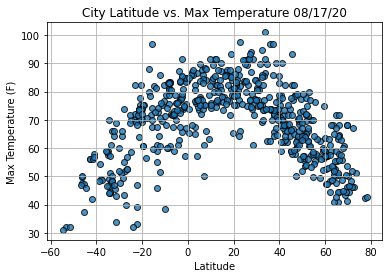

In [26]:
# Build the scatter plot for latitude vs. max temperature
plt.scatter(lats, max_temps, edgecolor="black", linewidths=1, marker="o", alpha=0.8, label="Cities")
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.grid(True)

plt.savefig("weather_data/Fig1.png")
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

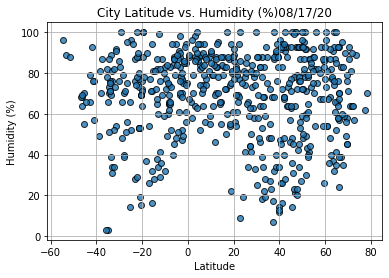

In [27]:
# scatter plot for latitude and humidity
plt.scatter(lats, humidity, edgecolor="black", linewidths=1, marker="o", alpha=0.8, label="Cities")
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.title(f"City Latitude vs. Humidity (%)"+ time.strftime("%x"))
plt.grid(True)

plt.savefig("weather_data/Fig2.png")
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

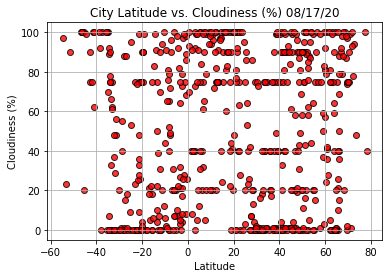

In [28]:
# scatter plot latitude and cloudiness
plt.scatter(lats, cloudiness, color="red", edgecolor="black", linewidths=1, marker="o", alpha=0.8, label="Cities")
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.grid(True)

plt.savefig("weather_data/Fig3.png")
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

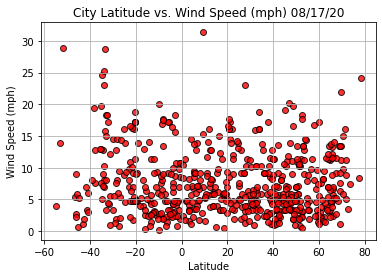

In [42]:
# scatter plot latitude and wind speed
plt.scatter(lats, wind_speed, color="red", edgecolor="black", linewidths=1, marker="o", alpha=0.8, label="Cities")
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.title(f"City Latitude vs. Wind Speed (mph) "+ time.strftime("%x"))
plt.grid(True)

plt.savefig("weather_data/Fig4.png")
plt.show

In [30]:
from scipy.stats import linregress

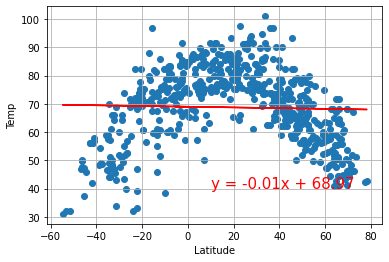

In [31]:
# Perform linear regression latitude and max temp
(slope, intercept, r_value, p_value, std_err) = linregress(lats, max_temps)

# Calculate the regression line "y values" from the slope and intercept.
regress_values = lats * slope + intercept

# Get the equation of the line.
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Create a scatter plot of the x and y values.
plt.scatter(lats, max_temps)

# Plot the regression line with the x-values and the y coordinates based on the intercept and slope.
plt.plot(lats, regress_values,"r")

# Annotate the text for the line equation and add its coordinates.
plt.annotate(line_eq, (10,40), fontsize=15, color="red")
plt.xlabel('Latitude')
plt.ylabel('Temp')
plt.grid(True)
plt.show()

In [32]:
# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.xlabel('Latitude')
    plt.title(title)
    plt.ylabel(y_label)
    plt.grid(True)
    plt.show()

In [33]:
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]
northern_hemi_df.head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Sibolga,ID,2020-08-18 04:53:44,1.74,98.78,86.97,58,8,4.83
2,Ulcinj,ME,2020-08-18 04:53:44,41.93,19.22,71.60,68,40,4.70
4,Leningradskiy,RU,2020-08-18 04:53:45,69.38,178.42,46.17,58,74,6.26
5,Iracoubo,GF,2020-08-18 04:53:45,5.48,-53.20,78.13,82,100,9.53
7,Grindavik,IS,2020-08-18 04:53:45,63.84,-22.43,51.80,100,90,6.93


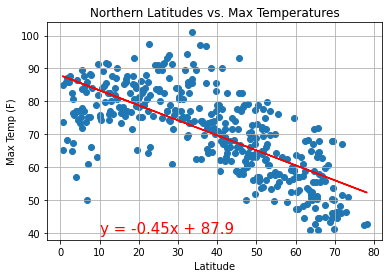

In [34]:
# linear regression on the northern hemisphere temperatures using a def function
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]

# call function
plot_linear_regression(x_values, y_values, "Northern Latitudes vs. Max Temperatures", "Max Temp (F)", (10,40))

-0.03015172101193748


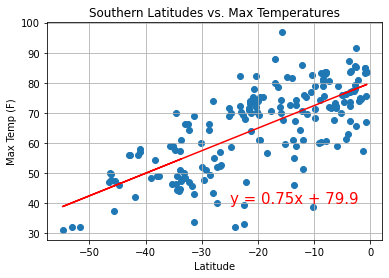

In [35]:
# linear regression on the southern hemisphere temperatures using a def function
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
print(r_value)
# call function
plot_linear_regression(x_values, y_values, "Southern Latitudes vs. Max Temperatures", "Max Temp (F)", (-25,40))

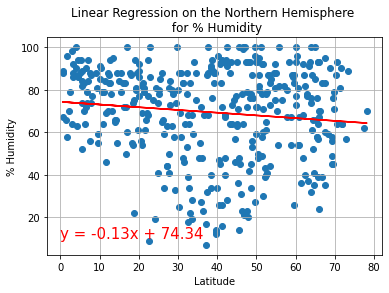

In [36]:
# Linear regression on the Northern Hemisphere and humidity
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]

# Call the function.
plot_linear_regression(x_values, y_values,"Linear Regression on the Northern Hemisphere \n for % Humidity", '% Humidity',(00,10))

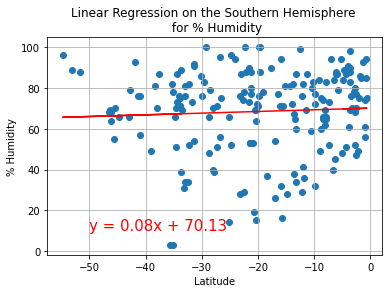

In [37]:
# Linear regression on the Southern Hemisphere and humidity
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for % Humidity', '% Humidity',(-50,10))

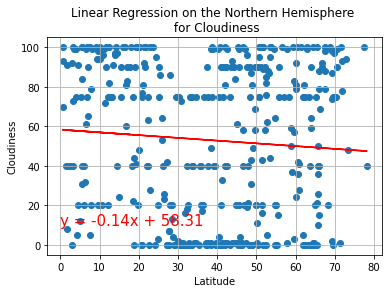

In [38]:
# Linear regression on the Northern Hemisphere and cloudiness
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]

# Call the function.
plot_linear_regression(x_values, y_values,"Linear Regression on the Northern Hemisphere \n for Cloudiness", 'Cloudiness',(00,10))

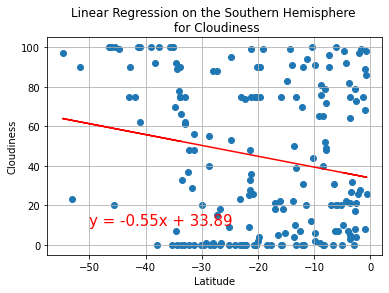

In [39]:
# Linear regression on the Southern Hemisphere and cloudiness
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]

# Call the function.
plot_linear_regression(x_values, y_values,"Linear Regression on the Southern Hemisphere \n for Cloudiness", 'Cloudiness',(-50,10))

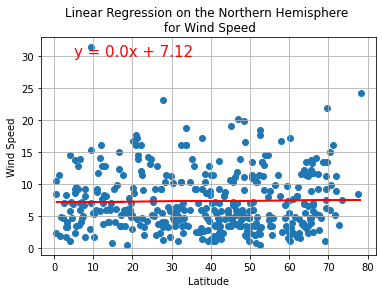

In [40]:
# Linear regression on the Northern Hemisphere and wind speed
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]

# Call the function.
plot_linear_regression(x_values, y_values,"Linear Regression on the Northern Hemisphere \n for Wind Speed", 'Wind Speed',(5,30))

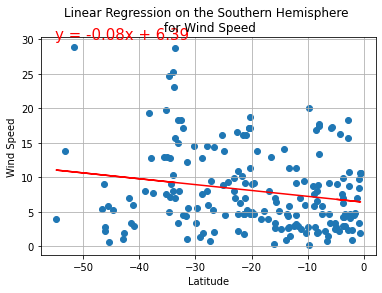

In [41]:
# Linear regression on the Southern Hemisphere and wind speed
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]

# Call the function.
plot_linear_regression(x_values, y_values,"Linear Regression on the Southern Hemisphere \n for Wind Speed", 'Wind Speed',(-55,30))